In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.activations import relu,tanh
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D,Dropout
from keras.utils import np_utils


In [2]:
data=pd.read_csv('fashion-mnist_test.csv')

In [3]:
x=data.values

In [4]:
X=x[:,1:]
y=x[:,0]
X=X/255.0
X=X.reshape(-1,28,28,1)
y=np_utils.to_categorical(y)
print(X.shape,y.shape)

(10000, 28, 28, 1) (10000, 10)


In [5]:
np_utils.to_categorical?

In [6]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0

In [7]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.00000001),metrics=['accuracy'])

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>95):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks=myCallback()

In [10]:
hist=model.fit(X,y,epochs=10,batch_size=500,validation_split=0.20,callbacks=[callbacks])

Epoch 1/10
16/16 [==============================] - 24s 1s/step - loss: 2.3072 - accuracy: 0.0833 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 2/10
16/16 [==============================] - 24s 1s/step - loss: 2.3072 - accuracy: 0.0844 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 3/10
16/16 [==============================] - 23s 1s/step - loss: 2.3068 - accuracy: 0.0840 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 4/10
16/16 [==============================] - 24s 1s/step - loss: 2.3067 - accuracy: 0.0825 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 5/10
16/16 [==============================] - 23s 1s/step - loss: 2.3074 - accuracy: 0.0815 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 6/10
16/16 [==============================] - 24s 1s/step - loss: 2.3064 - accuracy: 0.0801 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 7/10
16/16 [==============================] - 28s 2s/step - loss: 2.3062 - accuracy: 0.0851 - val_loss: 2.3060 - val_accuracy: 0.0695
Epoch 8/10
16/16 [==

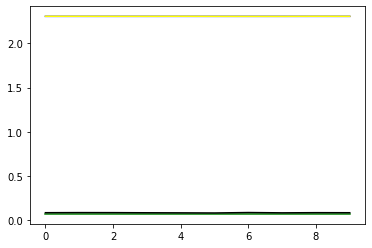

In [11]:
plt.plot(hist.history['val_loss'],color='blue')
plt.plot(hist.history['val_accuracy'],color='green')
plt.plot(hist.history['loss'],color='yellow')
plt.plot(hist.history['accuracy'],color='black')
plt.show()

In [12]:
from keras.models import load_model

In [13]:
model.save('cnn.h5')

In [14]:
loaded_model=load_model('./cnn.h5')

In [15]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0